In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
v1, v2, orientations = pickle.load(open("June 28 data.pickle", "rb"))


In [3]:
alpha, beta, gamma, otime = [np.array([o[name] for o in orientations]) for name in ("alpha", "beta", "gamma", "time")]

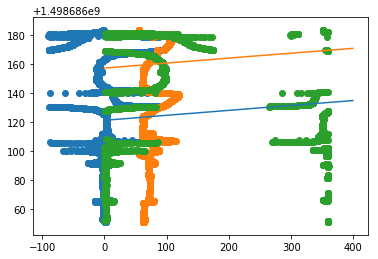

In [8]:
plt.scatter(gamma, otime)
plt.scatter(beta, otime)
plt.scatter(alpha, otime)

plt.plot(v1[0])
plt.plot(v2[0])

plt.show()

In [4]:
def angletomatrix(alpha, beta, gamma):
    
    cA = np.cos(alpha)
    cB = np.cos(beta)
    cC = np.cos(gamma)
    sA = np.sin(alpha)
    sB = np.sin(beta)
    sC = np.sin(gamma)
    
    M1 = np.matrix([[cC,   0,  sC],
                    [0,    1,   0],
                    [-sC,  0,  cC]])
    
    M2 = np.matrix([[1,    0,   0],
                    [0,   cB, -sB],
                    [0,   sB,  cB]])
    
    M3 = np.matrix([[cA, -sA,   0],
                    [sA,  cA,   0],
                    [0,    0,   1]])
 
    return (M1 * M2 * M3)

In [70]:
import scipy.interpolate

getAlpha = scipy.interpolate.interp1d(otime, alpha, assume_sorted=True)
getBeta = scipy.interpolate.interp1d(otime, beta, assume_sorted=True)
getGamma = scipy.interpolate.interp1d(otime, gamma, assume_sorted=True)


def rotation(time):
    c = 2 * np.pi / 360
    #ALPHA IS NEGATIVE HERE, AS FAR AS I CAN TELL BUG IN SPEC
    return angletomatrix(-getAlpha(time) * c, getBeta(time) * c, getGamma(time) * c)

R1 = [rotation(time) for time in v1[0]]
R1 = np.array(R1)

R2 = [rotation(time) for time in v2[0]]
R2 = np.array(R2)

In [66]:
#plt.plot(R1[:,1, 2], R1[:, 2, 2])
#plt.show()

In [67]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = [16, 16]
W = 768
x, y = np.meshgrid(np.linspace(0, 700, W), np.linspace(-350, 350, W))
z = np.zeros((W, W))

x, y, z = [i.flatten() for i in (x, y, z)]
#xp, yp, zp = [arr.reshape(W, W) for arr in np.matmul(R[0], np.array([x, y, z]))]

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


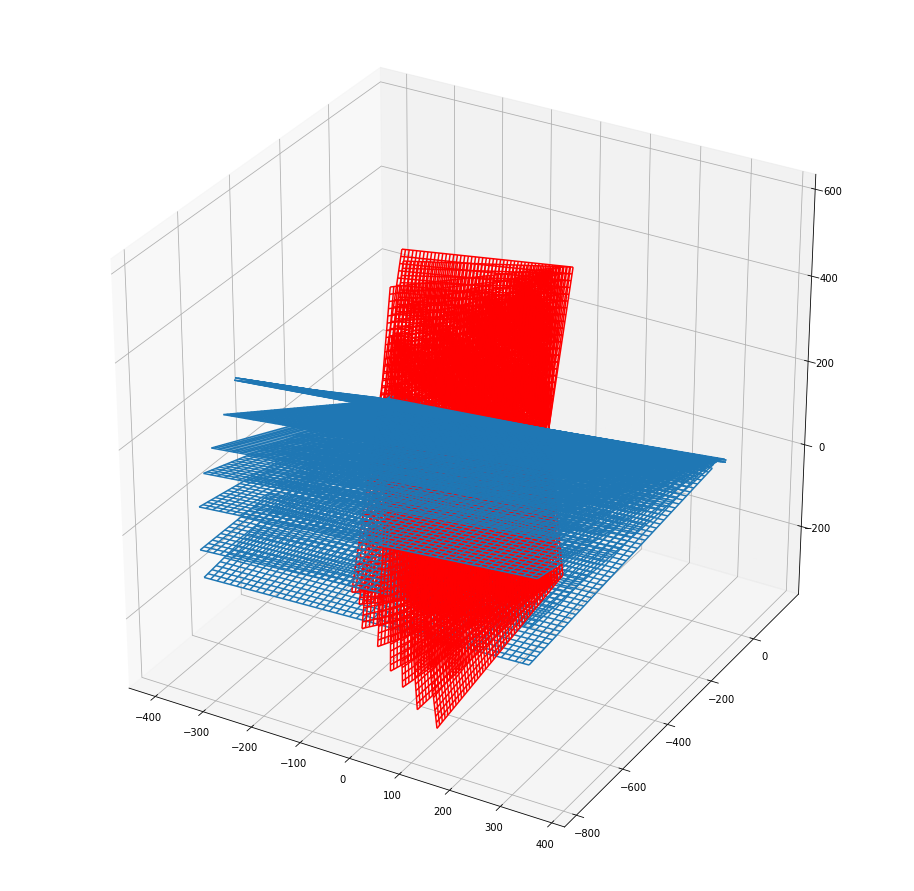

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')    

n = []

for r in R1[::50]:
    #print(r)
    xp, yp, zp = [arr.reshape(W, W) for arr in np.matmul(r, np.array([y, z, x]))]
    n.append((xp, yp, zp)) # or else it falls out of memory
    ax.plot_wireframe(xp, yp, zp)
    
for r in R2[::50]:
    #print(r)
    xp, yp, zp = [arr.reshape(W, W) for arr in np.matmul(r, np.array([y, z, x]))]
    n.append((xp, yp, zp)) # or else it falls out of memory
    ax.plot_wireframe(xp, yp, zp, colors="red")




plt.show()

In [44]:
xs.shape

(11520, 768)

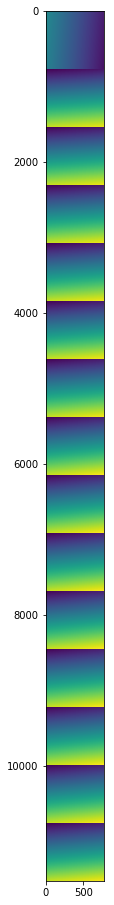

In [49]:
plt.imshow(ys)
plt.show()